# Unsupervised Machine Learning

## Clustring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

sns.set_style('darkgrid')
filterwarnings('ignore')

In [2]:
iris_data = sns.load_dataset('iris')
type(iris_data)

pandas.core.frame.DataFrame

In [3]:
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,setosa
135,7.7,3.0,6.1,2.3,virginica
69,5.6,2.5,3.9,1.1,versicolor
93,5.0,2.3,3.3,1.0,versicolor
57,4.9,2.4,3.3,1.0,versicolor


In [4]:
iris_data.shape

(150, 5)

In [5]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

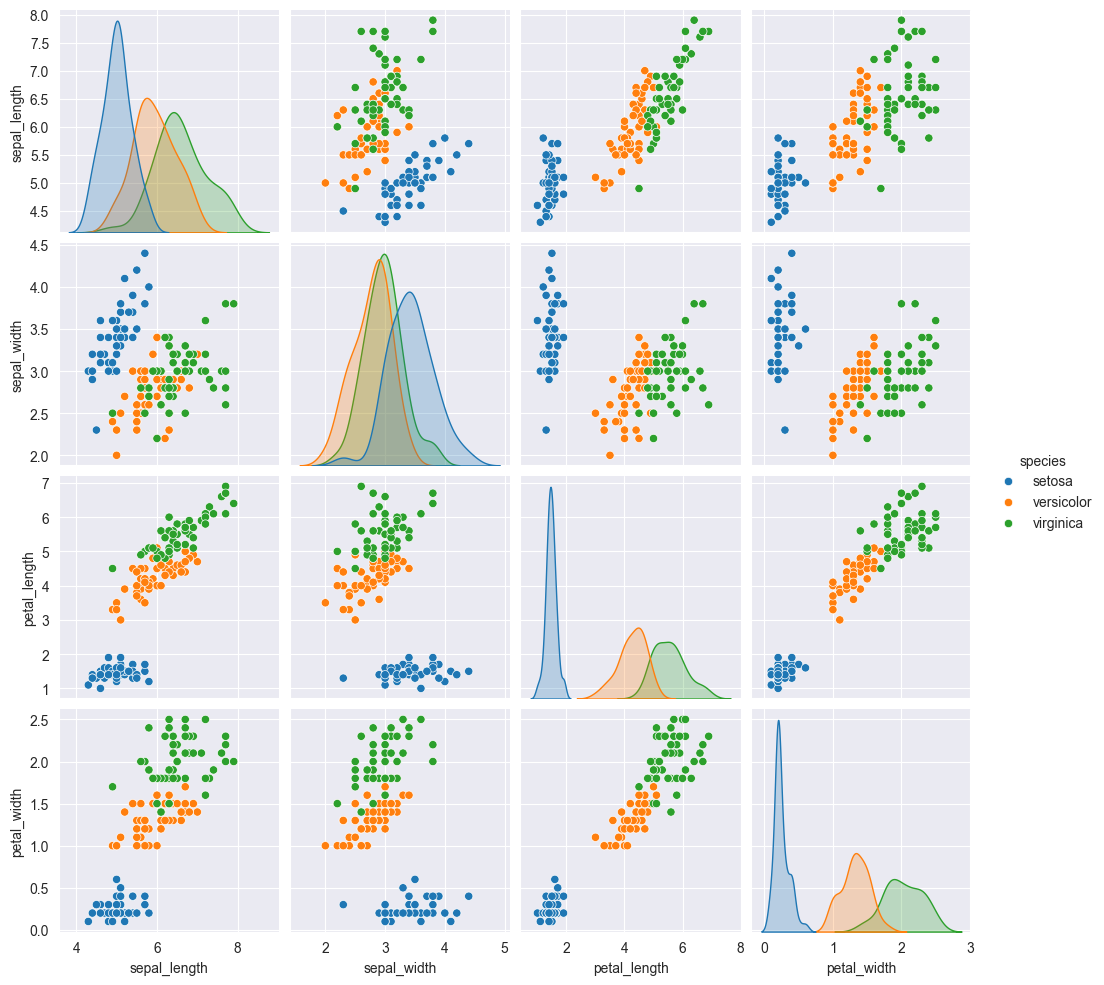

In [6]:
sns.pairplot(iris_data, hue='species')

Since we are Trying to do unsupervised learning so we don't require The class/species name, We will be clustering the species without the class name. For Now Dropping the Species. But will be saved as species_label

In [7]:
species_label = iris_data.species
iris_data.drop(columns='species', inplace=True)
iris_data.sample(5)

,sepal_length,sepal_width,petal_length,petal_width
42,4.4,3.2,1.3,0.2
97,6.2,2.9,4.3,1.3
30,4.8,3.1,1.6,0.2
127,6.1,3.0,4.9,1.8
138,6.0,3.0,4.8,1.8


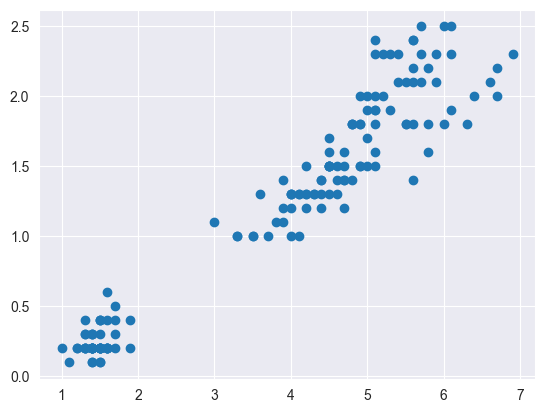

In [8]:
plt.scatter(data = iris_data , x='petal_length', y='petal_width')

### K-means

Here the clustering is done across all the diamensions presnet

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=len(iris_data)).fit(iris_data)

In [10]:
model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [11]:
pre = model.predict(iris_data)
num, freq = np.unique(pre, return_counts=True)
num, freq

(array([0, 1, 2]), array([50, 62, 38], dtype=int64))

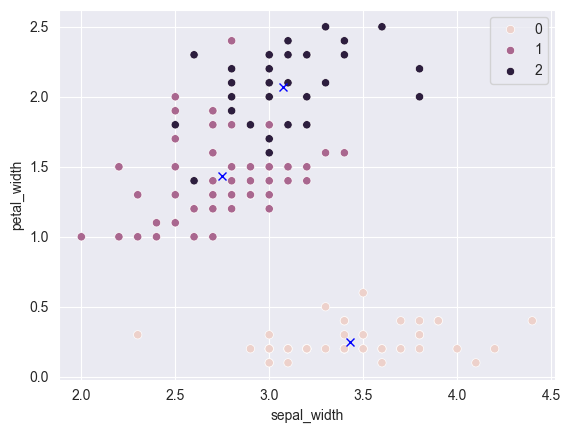

In [12]:
sns.scatterplot(data=iris_data, x='sepal_width', y='petal_width',hue= pre)
centers_x, centers_y = model.cluster_centers_[:,1], model.cluster_centers_[:,3]
plt.plot(centers_x, centers_y, 'xb')

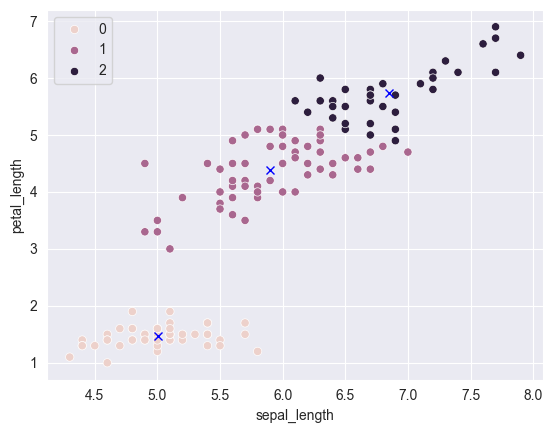

In [13]:
sns.scatterplot(data=iris_data, x='sepal_length', y='petal_length',hue= pre)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [14]:
# Total variance of all the clusters
model.inertia_

78.85144142614601

Changinig the Model params 

In [15]:
model = KMeans(n_clusters=6, random_state=len(iris_data)).fit(iris_data)

In [16]:
pre = model.predict(iris_data)
pre

array([0, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 5, 5, 0,
       0, 5, 0, 5, 0, 5, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 1, 3, 1, 3,
       3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 4, 3, 2, 4, 4, 2, 1, 2, 4, 2,
       4, 4, 4, 3, 4, 4, 4, 2, 2, 3, 4, 3, 2, 3, 4, 2, 3, 3, 4, 2, 2, 2,
       4, 3, 3, 2, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3])

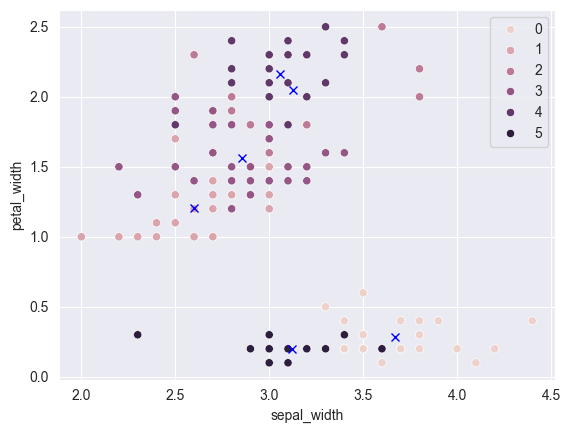

In [17]:
sns.scatterplot(data=iris_data, x='sepal_width', y='petal_width',hue= pre)
centers_x, centers_y = model.cluster_centers_[:,1], model.cluster_centers_[:,3]
plt.plot(centers_x, centers_y, 'xb')

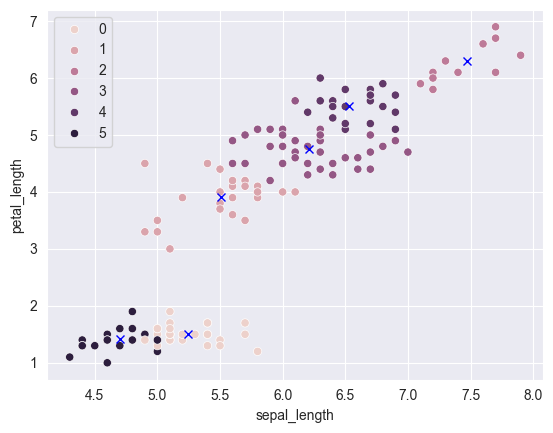

In [18]:
sns.scatterplot(data=iris_data, x='sepal_length', y='petal_length',hue= pre)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

In [19]:
model.inertia_

39.03998724608725

#### Making Elbow curve
This is a curve which we plot to check for the most optimal value of Number of clusters 

Text(0, 0.5, 'Inertia')

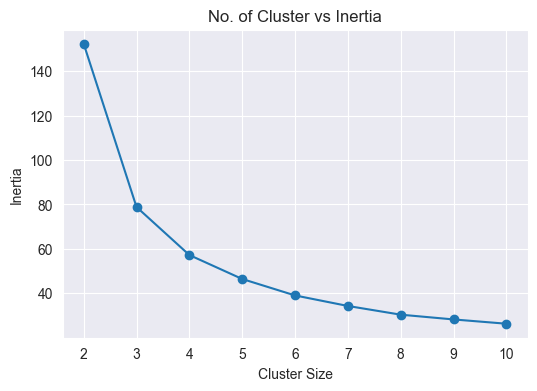

In [20]:
k_range = range(2, 11)
inertia = []
for k in k_range:
    model = KMeans(n_clusters=k, random_state=len(iris_data)).fit(iris_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(6,4))   
plt.title("No. of Cluster vs Inertia")
plt.plot(k_range, inertia, '-o')
plt.xlabel("Cluster Size")
plt.ylabel("Inertia")

The optimal value can be considered as either of 7 or 6 in this chart as after that the curve starts getting shtrurted 

### DBSCAN

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
?DBSCAN

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

The worst case memory complexity of DBSCAN is :math:`O({n}^2)`, which can
occur when the `eps` param is large and `min_samples` is low.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_s

In [23]:
model = DBSCAN(eps = 1, min_samples=5).fit(iris_data)

In [24]:
pre = model.labels_
np.unique(pre, return_counts=True)

(array([0, 1], dtype=int64), array([ 50, 100], dtype=int64))

In [25]:
model.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149], dtype=int64)

In [26]:
dir(model)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algorithm',
 'components_',
 'core_sample_indices_',
 'eps',
 'feature_names_in_',
 'fit',
 'fit_predict',
 'get_metadata_routing',
 'get_params',
 'labels_',
 'leaf_size',
 'metric',
 'metric_params',
 'min_samples',
 'n_fe

<Axes: xlabel='sepal_length', ylabel='petal_length'>

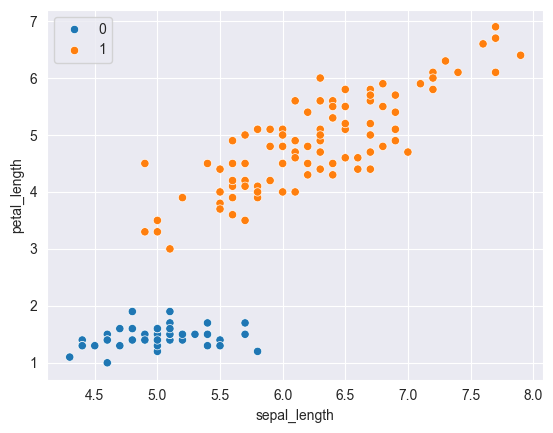

In [27]:
sns.scatterplot(iris_data, x='sepal_length', y='petal_length', hue=pre)

Trying some other Epsilon and min samples

In [28]:
def tryDBSCAN(**params):
    model = DBSCAN(**params).fit(iris_data)
    pre = model.labels_
    print(np.unique(pre, return_counts=True))
    plt.figure(figsize=(6, 4))
    sns.scatterplot(iris_data, x='sepal_length', y='petal_length', hue=pre)

(array([0], dtype=int64), array([150], dtype=int64))


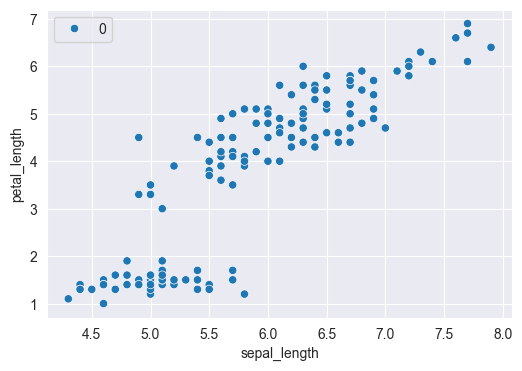

In [29]:
tryDBSCAN(eps = 2, min_samples = 25)

(array([-1,  0,  1], dtype=int64), array([26, 48, 76], dtype=int64))


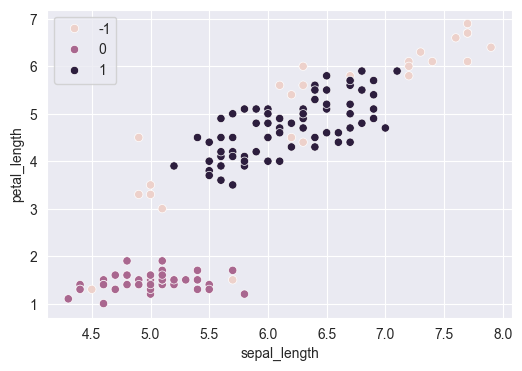

In [30]:
tryDBSCAN(eps = .5, min_samples = 8)